> Demonstration of process, actual label making is commented out, see the NB 021 for actual label making

In [1]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
import os

title_font_size = 30
label_font_size = 20

plt.rc('font', size=title_font_size) #controls default text size
plt.rc('axes', titlesize=title_font_size) #fontsize of the title
plt.rc('axes', labelsize=label_font_size) #fontsize of the x and y labels
plt.rc('xtick', labelsize=label_font_size) #fontsize of the x tick labels
plt.rc('ytick', labelsize=label_font_size) #fontsize of the y tick labels
plt.rc('legend', fontsize=label_font_size) #fontsize of the legend

In [2]:
mat = loadmat('Data/data_94b.mat')

num_vessels = mat['names'].shape[1]
m_rICT = mat['rICT']
m_ROI = mat['ROI']
m_t = mat['t']
t = m_t.reshape((m_t.shape[1]))

rict_df = pd.DataFrame(m_rICT)
print(rict_df.shape)
rict_df.head()

(3034, 7)


,0,1,2,3,4,5,6
0,1.061179,1.017361,1.114077,1.096296,1.147843,1.121544,1.109880
1,1.036253,0.968635,1.059771,1.021505,1.105764,1.083047,1.038855
2,1.073106,1.013525,1.078420,1.078318,1.058356,1.081180,1.069371
3,0.970642,0.959467,0.993976,0.988432,1.011027,1.045294,0.961510
4,0.957931,0.932092,0.951927,0.953285,0.935990,0.973522,0.945293


## Visualize at what time the stroke occurs
> __Note__: The stroke doesn't actually have an "end time" so the second delineation is just to focus in on a relevant area, and doesn't actually correspond to where the stroke "stops".

Text(0, 0.5, 'rICT')

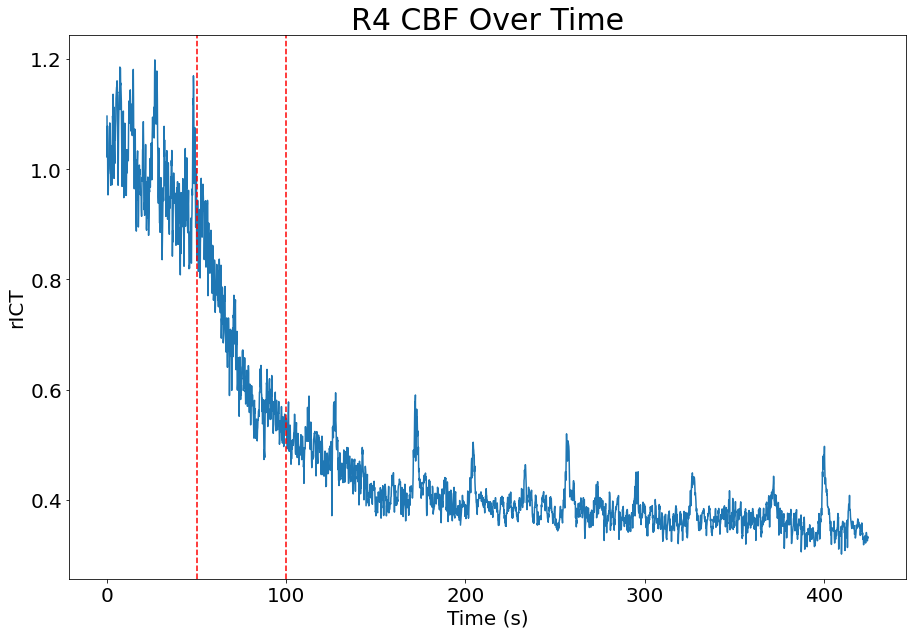

In [3]:
plt.figure(figsize=(15,10))
plt.plot(t, rict_df.iloc[:, 3])
plt.axvline(x=50, color='red', linestyle='--')
plt.axvline(x=100, color='red', linestyle='--')
plt.title("R4 CBF Over Time")
plt.xlabel('Time (s)')
plt.ylabel('rICT')

Text(0, 0.5, 'rICT')

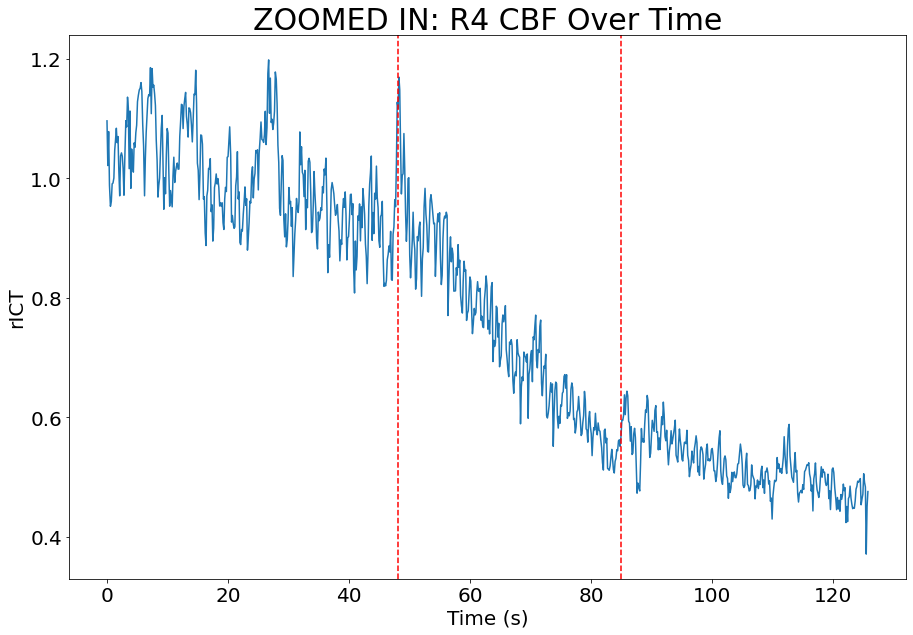

In [4]:
stroke_start = 48
stroke_window_end = 900
stroke_end = 85

plt.figure(figsize=(15,10))
plt.plot(t[:stroke_window_end], rict_df.iloc[:stroke_window_end, 3])
plt.axvline(x=stroke_start, color='red', linestyle='--')
plt.axvline(x=stroke_end, color='red', linestyle='--')
plt.title("ZOOMED IN: R4 CBF Over Time")
plt.xlabel('Time (s)')
plt.ylabel('rICT')

## Now make the actual label

In [5]:
stroke_start_idx = np.abs(t - stroke_start).argmin()
stroke_end_idx = np.abs(t - stroke_end).argmin()

# Regression - single time stamp
# Could set no strokes to -1... should test
y_train_reg = np.zeros(num_vessels)
# This is where the stroke occurred, known a priori for now, for training
y_train_reg[3] = stroke_start_idx

# Classification - clustering of stroke occurrence
# Boolean mask
#y_train_class = np.zeros((num_vessels, t.shape[0]))
#y_train_class[3, stroke_start_idx:stroke_end_idx] = 1

#y_train_class_1D = np.zeros(num_vessels)
#y_train_class_1D[3] = 1

Save the data

In [6]:
#np.save(os.path.join('Labels', '94b_reg'), y_train_reg)
#np.save(os.path.join('Labels', '94b_class'), y_train_class)
#np.save(os.path.join('Labels', '94b_class_1D'), y_train_class_1D)

# Repeat for new dataset

In [7]:
mat = loadmat('Data/data_95q.mat')

num_vessels = mat['names'].shape[1]
m_rICT = mat['rICT']
m_ROI = mat['ROI']
m_t = mat['t'] #(datetime only)
t = m_t.reshape((m_t.shape[1]))

print(f"Number of vessels: {num_vessels}")
print(f"m_rICT shape: {m_rICT.shape}")

rict_df = pd.DataFrame(m_rICT)
print(f"rict_df shape: {rict_df.shape}")
rict_df.head()

Number of vessels: 7
m_rICT shape: (4000, 7)
rict_df shape: (4000, 7)


,0,1,2,3,4,5,6
0,1.104496,1.065481,1.096309,1.066983,1.033309,1.050900,1.020680
1,1.070832,1.069529,1.116270,1.065764,0.971102,1.073872,1.043329
2,1.021953,1.009902,0.998641,1.011728,0.992180,1.027361,1.014699
3,1.018994,0.991405,1.013847,1.043583,0.970549,1.035323,1.035490
4,1.026853,1.005429,1.053537,1.052560,1.000330,1.069433,1.061703


Text(0, 0.5, 'rICT')

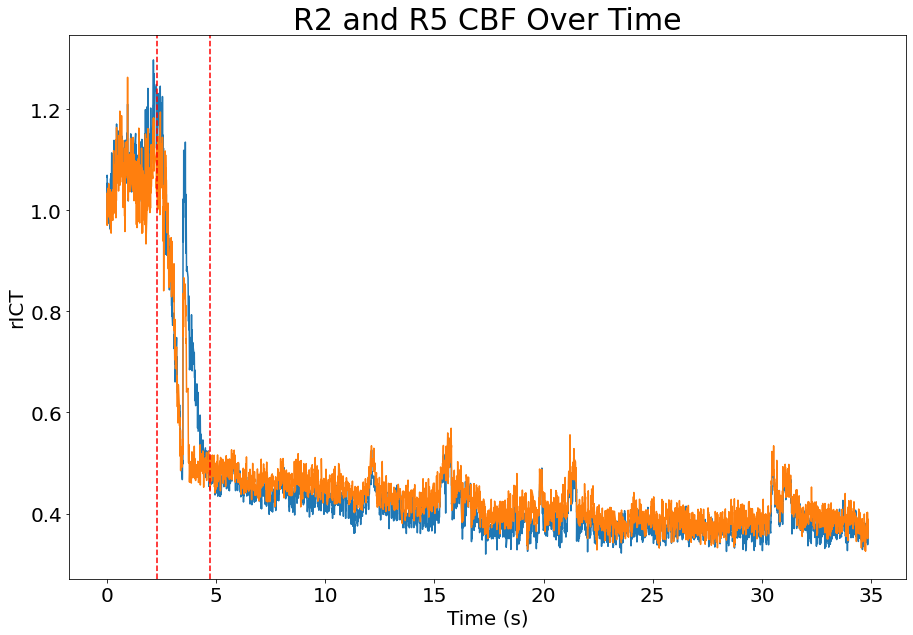

In [8]:
plt.figure(figsize=(15,10))
plt.plot(t, rict_df.iloc[:, 1])
plt.plot(t, rict_df.iloc[:, 4])
plt.axvline(x=2.3, color='red', linestyle='--')
plt.axvline(x=4.7, color='red', linestyle='--')
plt.title("R2 and R5 CBF Over Time")
plt.xlabel('Time (s)')
plt.ylabel('rICT')

Text(0, 0.5, 'rICT')

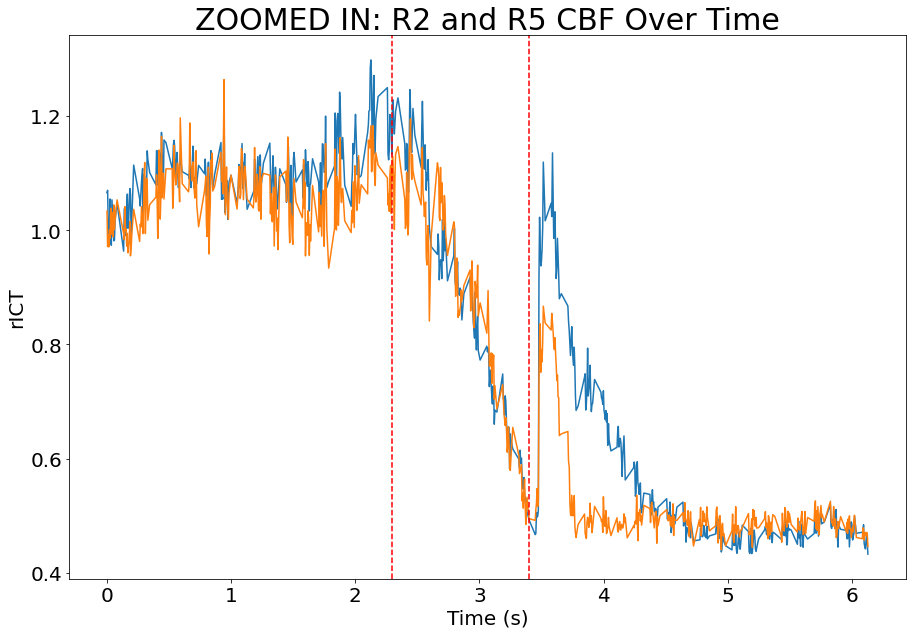

In [9]:
stroke_start = 2.3
stroke_window_end = 700
stroke_end = 3.4

plt.figure(figsize=(15,10))
plt.plot(t[:stroke_window_end], rict_df.iloc[:stroke_window_end, 1])
plt.plot(t[:stroke_window_end], rict_df.iloc[:stroke_window_end, 4])
plt.axvline(x=stroke_start, color='red', linestyle='--')
plt.axvline(x=stroke_end, color='red', linestyle='--')
plt.title("ZOOMED IN: R2 and R5 CBF Over Time")
plt.xlabel('Time (s)')
plt.ylabel('rICT')

In [10]:
stroke_start_idx = np.abs(t - stroke_start).argmin()
stroke_end_idx = np.abs(t - stroke_end).argmin()

# Regression - single time stamp
# Could set no strokes to -1... should test
y_train_reg = np.zeros(num_vessels)
# This is where the stroke occurred, known a priori for now, for training
y_train_reg[1] = stroke_start_idx
y_train_reg[4] = stroke_start_idx

# Classification - clustering of stroke occurrence
# Boolean mask
#y_train_class = np.zeros((num_vessels, t.shape[0]))
#y_train_class[1, stroke_start_idx:stroke_end_idx] = 1
#y_train_class[4, stroke_start_idx:stroke_end_idx] = 1

#y_train_class_1D = np.zeros(num_vessels)
#y_train_class_1D[1] = 1
#y_train_class_1D[4] = 1

In [11]:
#np.save(os.path.join('Labels', '95_reg'), y_train_reg)
#np.save(os.path.join('Labels', '95_class'), y_train_class)
#np.save(os.path.join('Labels', '95_class_1D'), y_train_class_1D)